In [1]:
import pandas as pd
from matplotlib.pyplot import *
from scipy.interpolate import interp1d
from numpy import polyfit, poly1d, linspace, array

In [2]:
style.use('seaborn-darkgrid')
rcParams['figure.figsize'] = (24, 16)

In [3]:
path = '2019_04_11/'
ext = '.xlsx'

In [4]:
pressure = ['93', '94', '95', '96', '97']
current = ['0,45', '0,5', '0,55', '0,6', '0,65']

In [5]:
class DataFrame():
    sheets = []
           
    def __new__(cls, name, sheet, index, df=None):    
        if len(cls.sheets) < 5 :
            cls.sheets.append(super().__new__(cls))
        else:
            cls.sheets = []
            cls.sheets.append(super().__new__(cls))
        return super(DataFrame, cls).__new__(cls)
    
    def __init__(self, name, sheet, index, df=None):
        self.name = name
        self.sheet = sheet
        self.index = index
        self.df = pd.read_excel(path + name + ext, sheet[index], \
                                names=['wave length $\lambda$', 'saturation'])
        
        """
        def __get__(self, inst, inst_type): 
            return self
        
        @staticmethod
        def filler():
            sheets.append(self)
        """
        
    def table(self, lines):
        try:
            self.df = self.df.set_index('wave length $\lambda$')
        except KeyError:
            pass
        return self.df.head(lines)

In [6]:
class CurveLine(DataFrame):      
    def __init__(self, name, sheet, index, x_ax=None, y_ax=None, folder='pics/', ext='png', dpi=500):
        super().__init__(name, sheet, index, df=None)  # by the way it even doesn't recognize set folder\
        self.x_ax = array(self.df.index)               # ext and dpi
        self.y_ax = self.df['saturation']
        self.folder = folder
        self.ext = ext
        self.dpi = dpi
     
        # because of __new__ no option to initialise\
        # attrs of what is not in DataFrame\
        # just such a stupid thing
        
    def customizer(self, title, color, fontsize):
        self.title = title
        self.color = color
        self.fontsize = fontsize
      
    def drawer(self):
        self.name = self.name + '_' + self.sheet[self.index] + '.'
        plot(self.x_ax, self.y_ax, self.color)
        title(self.title, fontsize=self.fontsize)
        xlabel('Wave Length $\lambda$, nm', fontsize=self.fontsize)
        ylabel('Saturation Intensity, %', fontsize=self.fontsize)
        savefig(self.folder+self.name+self.ext, format=self.ext, dpi=self.dpi)

In [7]:
storage = {'p_full':pressure, 'I_full':current, 'p_max':pressure, 'I_max':current}

for _ in list(storage.keys()):
    for i in range(5):
        print(storage[_], i)
        DataFrame.sheets[i] = CurveLine(_, sheet=storage[_], index=i)  # ridiculous kostbilb
    storage[_] = list(DataFrame.sheets)  # ebanaya ssiblka

['93', '94', '95', '96', '97'] 0
['93', '94', '95', '96', '97'] 1
['93', '94', '95', '96', '97'] 2
['93', '94', '95', '96', '97'] 3
['93', '94', '95', '96', '97'] 4
['0,45', '0,5', '0,55', '0,6', '0,65'] 0
['0,45', '0,5', '0,55', '0,6', '0,65'] 1
['0,45', '0,5', '0,55', '0,6', '0,65'] 2
['0,45', '0,5', '0,55', '0,6', '0,65'] 3
['0,45', '0,5', '0,55', '0,6', '0,65'] 4
['93', '94', '95', '96', '97'] 0
['93', '94', '95', '96', '97'] 1
['93', '94', '95', '96', '97'] 2
['93', '94', '95', '96', '97'] 3
['93', '94', '95', '96', '97'] 4
['0,45', '0,5', '0,55', '0,6', '0,65'] 0
['0,45', '0,5', '0,55', '0,6', '0,65'] 1
['0,45', '0,5', '0,55', '0,6', '0,65'] 2
['0,45', '0,5', '0,55', '0,6', '0,65'] 3
['0,45', '0,5', '0,55', '0,6', '0,65'] 4


In [8]:
for _ in list(storage.keys()):
    for i in range(len(pressure or current)):
        display(_, i, storage[_][i].table(10))

'p_full'

0

,saturation
wave length $\lambda$,
320.01,0.243392
320.02,0.131553
320.03,0.131553
320.04,0.131553
320.05,0.131553
320.06,0.019714
320.07,0.243392
320.08,0.243392
320.09,0.243392


'p_full'

1

,saturation
wave length $\lambda$,
320.01,0.021035
320.02,0.132875
320.03,0.132875
320.04,0.132875
320.05,0.021035
320.06,0.021035
320.07,0.021035
320.08,0.132875
320.09,0.021035


'p_full'

2

,saturation
wave length $\lambda$,
320.01,0.257875
320.02,0.034196
320.03,0.034196
320.04,0.146035
320.05,0.257875
320.06,0.146035
320.07,0.257875
320.08,0.257875
320.09,0.146035


'p_full'

3

,saturation
wave length $\lambda$,
320.01,0.157875
320.02,0.157875
320.03,-0.065804
320.04,0.046035
320.05,0.157875
320.06,0.046035
320.07,0.046035
320.08,0.046035
320.09,0.046035


'p_full'

4

,saturation
wave length $\lambda$,
325.01,0.034196
325.02,0.034196
325.03,0.146035
325.04,-0.077643
325.05,0.034196
325.06,0.146035
325.07,0.034196
325.08,0.034196
325.09,0.034196


'I_full'

0

,saturation
wave length $\lambda$,
320.01,-0.057929
320.02,-0.057929
320.03,0.053910
320.04,0.053910
320.05,-0.057929
320.06,0.165749
320.07,0.165749
320.08,0.053910
320.09,0.277588


'I_full'

1

,saturation
wave length $\lambda$,
320.01,0.081553
320.02,0.081553
320.03,0.081553
320.04,-0.030286
320.05,-0.030286
320.06,-0.030286
320.07,-0.030286
320.08,-0.030286
320.09,0.081553


'I_full'

2

,saturation
wave length $\lambda$,
320.01,0.202588
320.02,0.090749
320.03,0.202588
320.04,0.314428
320.05,0.202588
320.06,0.314428
320.07,0.314428
320.08,0.314428
320.09,0.314428


'I_full'

3

,saturation
wave length $\lambda$,
320.01,-0.007929
320.02,0.103910
320.03,0.103910
320.04,0.103910
320.05,-0.007929
320.06,-0.007929
320.07,0.103910
320.08,0.103910
320.09,0.103910


'I_full'

4

,saturation
wave length $\lambda$,
320.01,0.164428
320.02,0.052588
320.03,0.052588
320.04,0.164428
320.05,0.052588
320.06,0.052588
320.07,0.276267
320.08,0.164428
320.09,0.052588


'p_max'

0

,saturation
wave length $\lambda$,
332.000130,-0.042037
332.003463,-0.100702
332.006796,-0.071369
332.010129,-0.012704
332.013462,-0.100702
332.016795,0.016628
332.020128,-0.012704
332.023461,-0.042037
332.026794,-0.042037


'p_max'

1

,saturation
wave length $\lambda$,
332.000130,0.000645
332.003463,0.000645
332.006796,0.059310
332.010129,0.029977
332.013462,0.029977
332.016795,0.059310
332.020128,0.029977
332.023461,0.029977
332.026794,0.117975


'p_max'

2

,saturation
wave length $\lambda$,
332.000130,0.083314
332.003463,0.053982
332.006796,0.053982
332.010129,0.053982
332.013462,0.053982
332.016795,0.053982
332.020128,0.053982
332.023461,0.053982
332.026794,0.024649


'p_max'

3

,saturation
wave length $\lambda$,
332.000130,0.012647
332.003463,-0.046018
332.006796,-0.016686
332.010129,-0.016686
332.013462,-0.075351
332.016795,-0.046018
332.020128,-0.046018
332.023461,-0.046018
332.026794,-0.046018


'p_max'

4

,saturation
wave length $\lambda$,
331.000230,0.075645
331.003563,0.046312
331.006896,0.075645
331.010229,0.016979
331.013562,0.046312
331.016895,-0.012353
331.020228,0.016979
331.023561,-0.012353
331.026894,-0.041686


'I_max'

0

,saturation
wave length $\lambda$,
332.000130,-0.011358
332.003463,0.017975
332.006796,0.076640
332.010129,0.047307
332.013462,0.076640
332.016795,0.076640
332.020128,0.017975
332.023461,0.076640
332.026794,0.047307


'I_max'

1

,saturation
wave length $\lambda$,
332.000130,-0.352399
332.003463,0.028924
332.006796,-0.205736
332.010129,-0.059073
332.013462,0.058257
332.016795,-0.088406
332.020128,-0.235069
332.023461,-0.117738
332.026794,-0.029741


'I_max'

2

,saturation
wave length $\lambda$,
332.000130,-0.033372
332.003463,0.025294
332.006796,0.025294
332.010129,0.025294
332.013462,0.025294
332.016795,0.054626
332.020128,-0.033372
332.023461,0.025294
332.026794,-0.033372


'I_max'

3

,saturation
wave length $\lambda$,
332.000130,-0.162704
332.003463,-0.074706
332.006796,0.130622
332.010129,0.101289
332.013462,-0.016041
332.016795,-0.074706
332.020128,-0.074706
332.023461,-0.074706
332.026794,-0.045374


'I_max'

4

,saturation
wave length $\lambda$,
332.000130,-0.016666650772095
332.003463,-0.135185241699219
332.006796,0.10185170173645
332.010129,-0.016666650772095
332.013462,-0.016666650772095
332.016795,-0.016666650772095
332.020128,-0.016666650772095
332.023461,-0.135185241699219
332.026794,-0.016666650772095


In [93]:
array(storage['p_full'][0].df.index)

array([320.01, 320.02, 320.03, ..., 399.98, 399.99, 400.  ])

None

None

None

None

None

None

None

None

None

None

None

None

None

None

None

None

None

None

None

TypeError: datetime.datetime(2025, 4, 1, 0, 0) is not a string

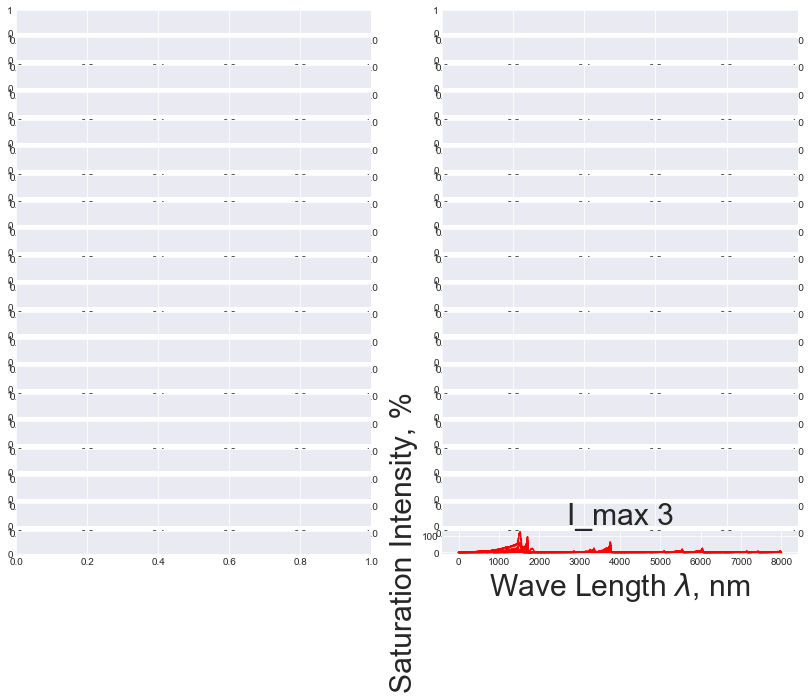

In [10]:
fig, axes = subplots(20,2, figsize=(14, 10))
for _ in list(storage.keys()):
    for i in range(len(pressure or current)):
        storage[_][i].customizer(str(_)+' '+str(i), '-r', 30)
        display(storage[_][i].drawer()) 

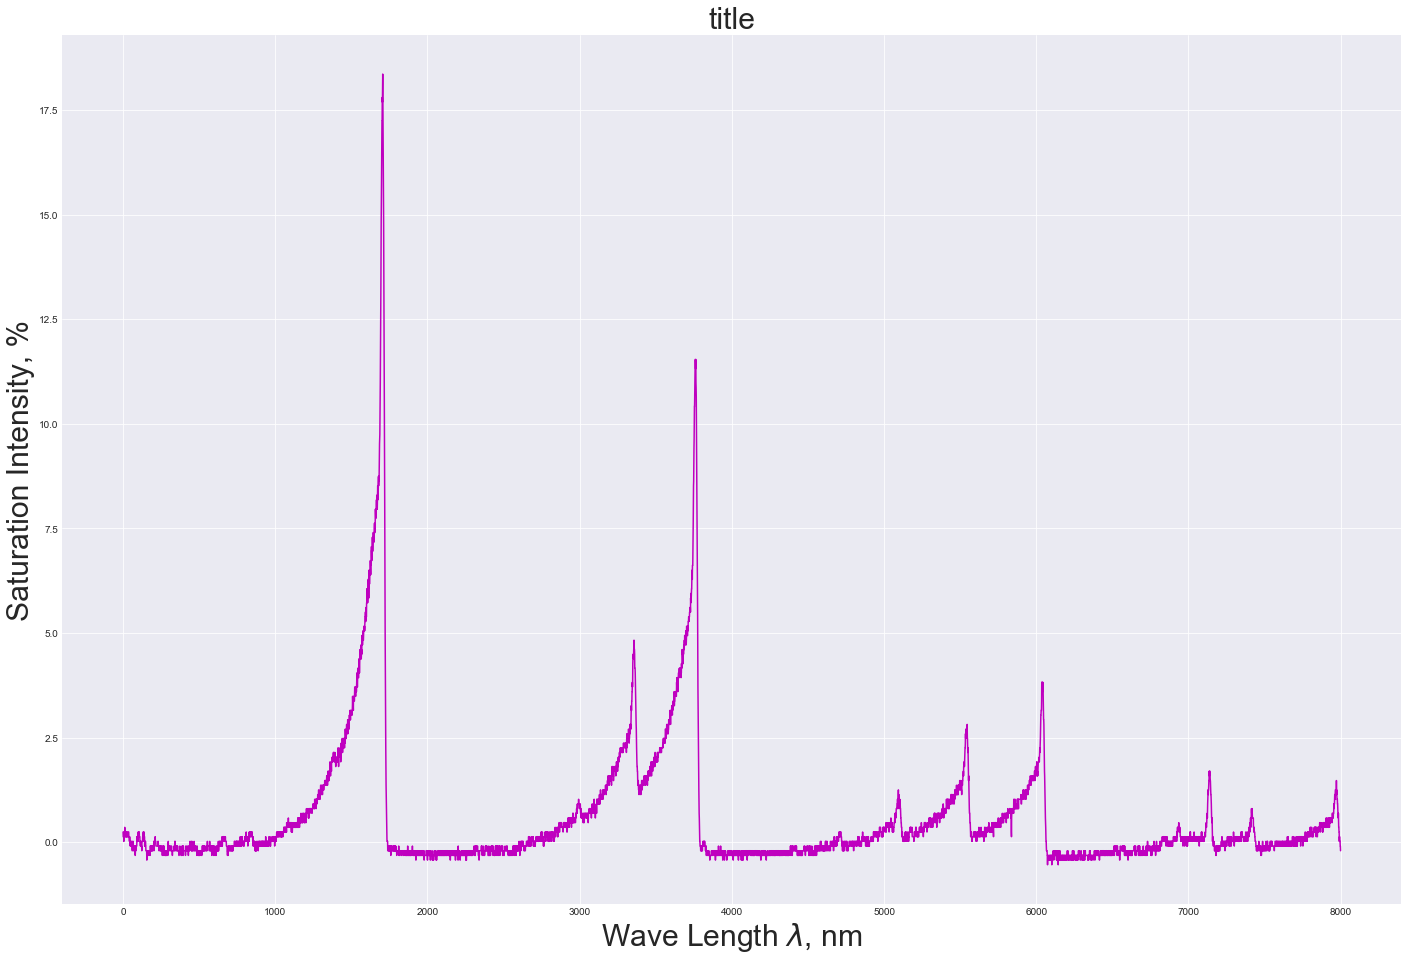

In [555]:
df_04A_electrod['log'] = np.log10(df_04A_electrod.I)
df_04A_electrod.head()

NameError: name 'df_04A_electrod' is not defined

Text(0.5,1,'4А на электродах')

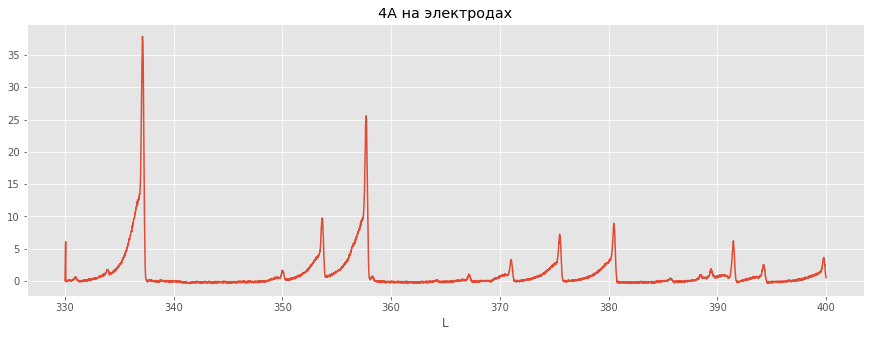

In [5]:
df_04A_electrod['I'].plot().set_title('4А на электродах')

Text(0.5,1,'Логарифм 4А на электродах')

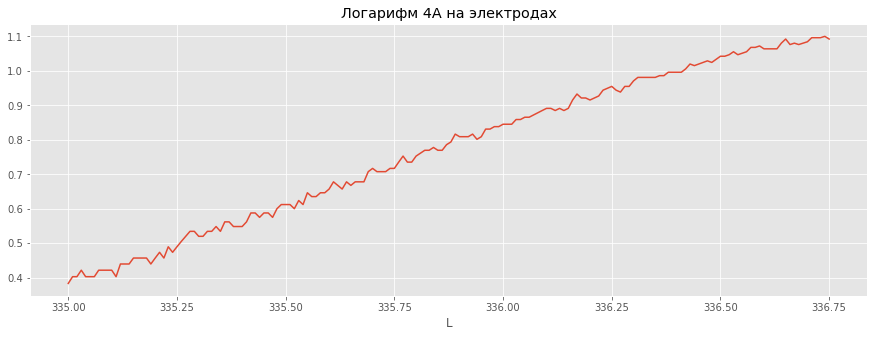

In [6]:
df_04A_electrod['log'][335:336.75].plot().set_title('Логарифм 4А на электродах')

In [7]:
y = df_04A_electrod.log[335:336.75].values
x = df_04A_electrod.index.values[500:676]

[   0.428427  -143.1262341]


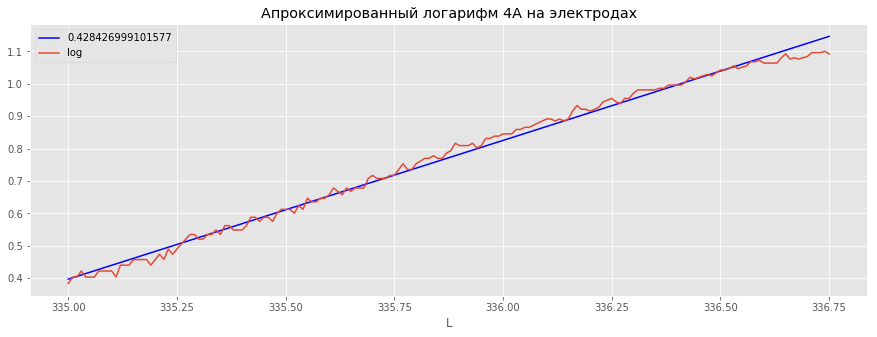

In [11]:
p = np.polyfit(x, y, 1)
yp = np.polyval(p, x)
print(p)

plt.plot(x, yp, 'b', label=p[0])
df_04A_electrod['log'][335:336.75].plot().set_title('Апроксимированный логарифм 4А на электродах')
plt.legend()
plt.show()

In [9]:
df_04A_general = pd.read_excel('04A_general.xlsx', index_col='L')

Text(0.5,1,'04A Общий')

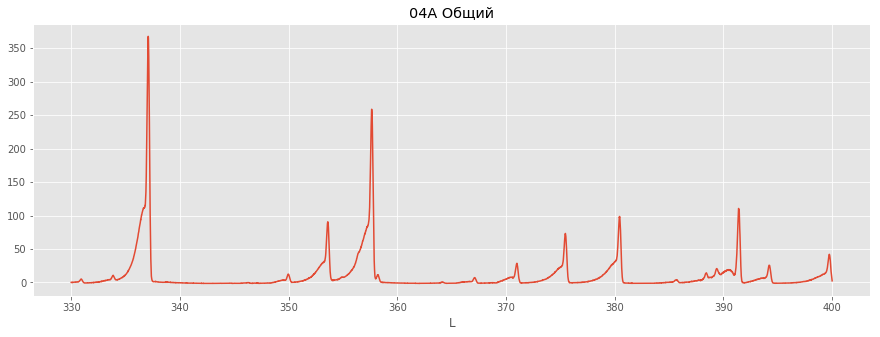

In [10]:
df_04A_general['I'].plot().set_title('04A Общий')

In [11]:
df_04A_general['log'] = np.log10(df_04A_general.I)

/home/danny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


Text(0.5,1,'Логарифм 4А Общий')

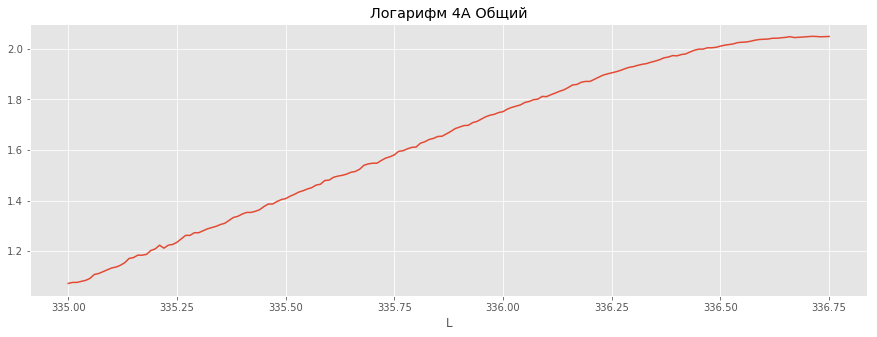

In [12]:
df_04A_general['log'][335:336.75].plot().set_title('Логарифм 4А Общий')

In [13]:
y = df_04A_general.log[335:336.75].values
x = df_04A_general.index.values[500:676]

[   0.60738827 -202.36781824]


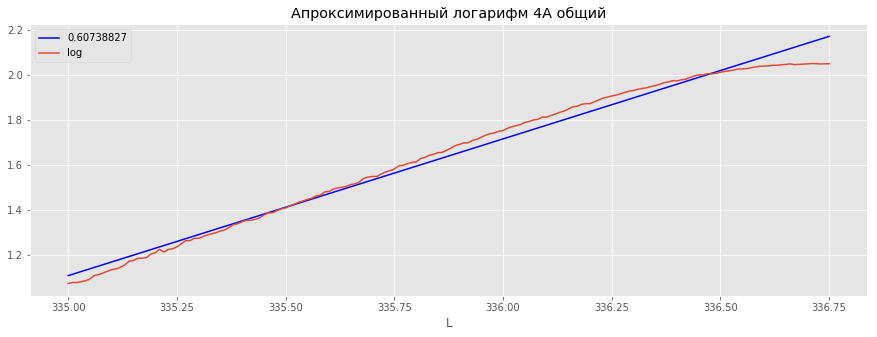

In [14]:
p = np.polyfit(x, y, 1)
yp = np.polyval(p, x)
print(p)

plt.plot(x, yp, 'b', label='0.60738827')
df_04A_general['log'][335:336.75].plot().set_title('Апроксимированный логарифм 4А общий')
plt.legend()
plt.show()

In [15]:
df_04A_norm = pd.read_excel('04A_norm.xlsx', index_col='L')

Text(0.5,1,'04A norm')

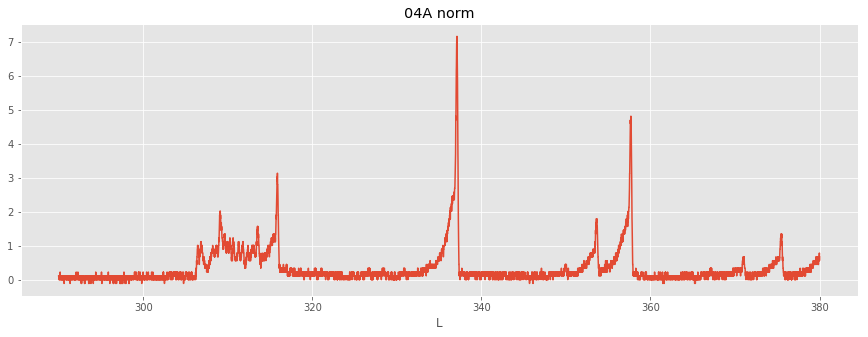

In [16]:
df_04A_norm['I'].plot().set_title('04A norm')

In [17]:
df_04A_norm['log'] = np.log10(df_04A_norm.I)

/home/danny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


Text(0.5,1,'Логарифм 4А Norm')

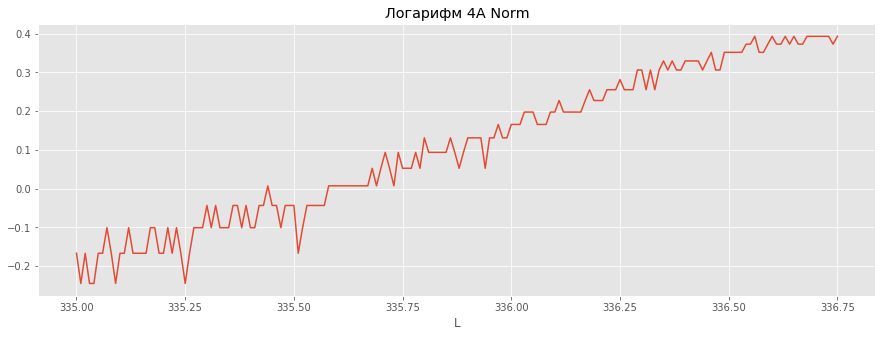

In [18]:
df_04A_norm['log'][335:336.75].plot().set_title('Логарифм 4А Norm')

In [19]:
y = df_04A_norm.log[335:336.75].values
x = df_04A_norm.index.values[4501:4677]

[   0.36957941 -124.02861858]


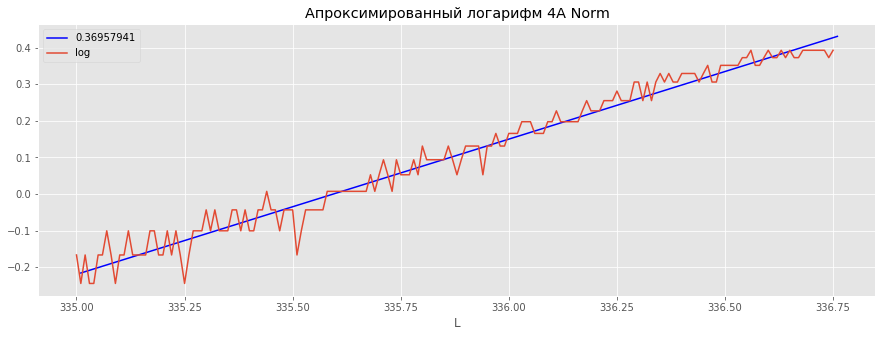

In [20]:
p = np.polyfit(x, y, 1)
yp = np.polyval(p, x)
print(p)

plt.plot(x, yp, 'b', label='0.36957941')
df_04A_norm['log'][335:336.75].plot().set_title('Апроксимированный логарифм 4А Norm')
plt.legend()
plt.show()

In [21]:
df_05A = pd.read_excel('05A.xlsx', index_col='L')

In [22]:
df_05A['log'] = np.log10(df_05A.I)

/home/danny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


Text(0.5,1,'05A')

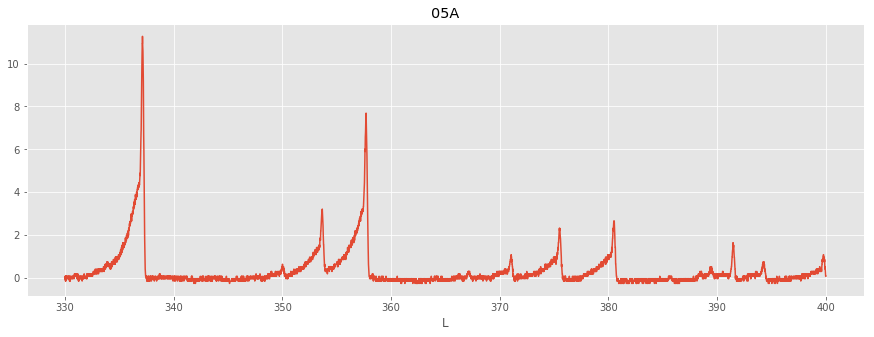

In [23]:
df_05A['I'].plot().set_title('05A')

Text(0.5,1,'Логарифм 5A')

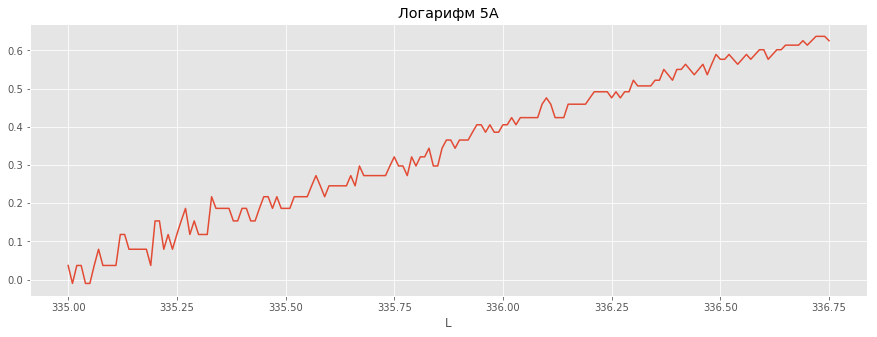

In [24]:
df_05A['log'][335:336.75].plot().set_title('Логарифм 5A')

In [25]:
y = df_05A.log[335:336.75].values
x = df_05A.index.values[500:676]

[   0.35982667 -120.51184113]


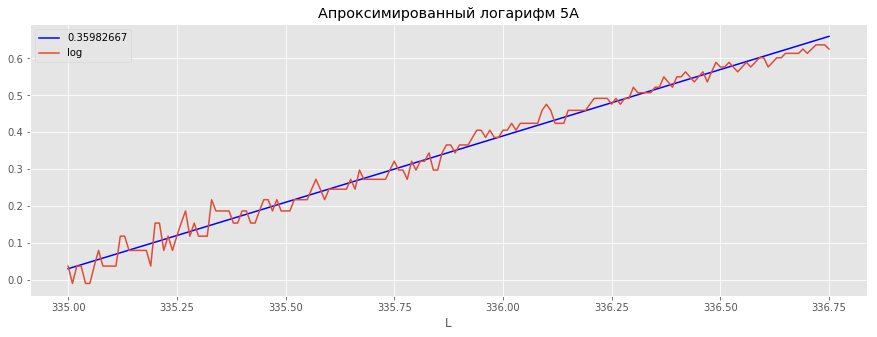

In [26]:
p = np.polyfit(x, y, 1)
yp = np.polyval(p, x)
print(p)

plt.plot(x, yp, 'b', label='0.35982667')
df_05A['log'][335:336.75].plot().set_title('Апроксимированный логарифм 5A')
plt.legend()
plt.show()

In [27]:
df_05A_electrod = pd.read_excel('05A_electrod.xlsx', index_col='L')

Text(0.5,1,'05A на электродах')

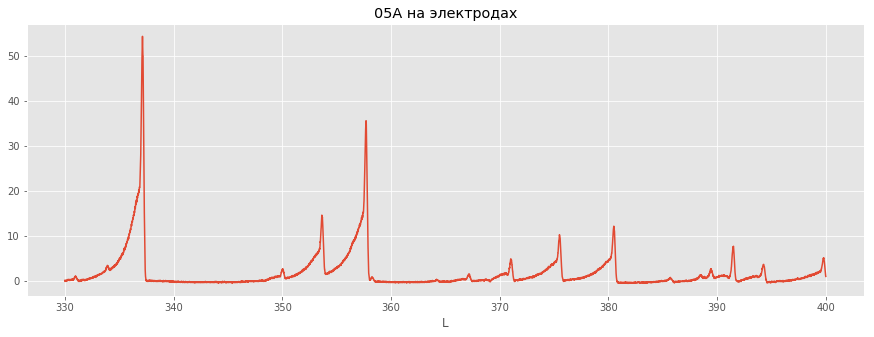

In [28]:
df_05A_electrod['I'].plot().set_title('05A на электродах')

In [29]:
df_05A_electrod['log'] = np.log10(df_05A_electrod.I)

/home/danny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


Text(0.5,1,'Логарифм 5A на электродах')

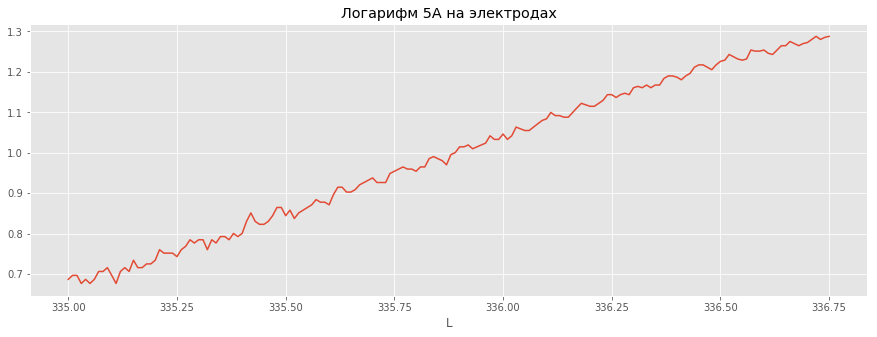

In [30]:
df_05A_electrod['log'][335:336.75].plot().set_title('Логарифм 5A на электродах')

In [31]:
y = df_05A_electrod.log[335:336.75].values
x = df_05A_electrod.index.values[500:676]

[   0.36721703 -122.3481155 ]


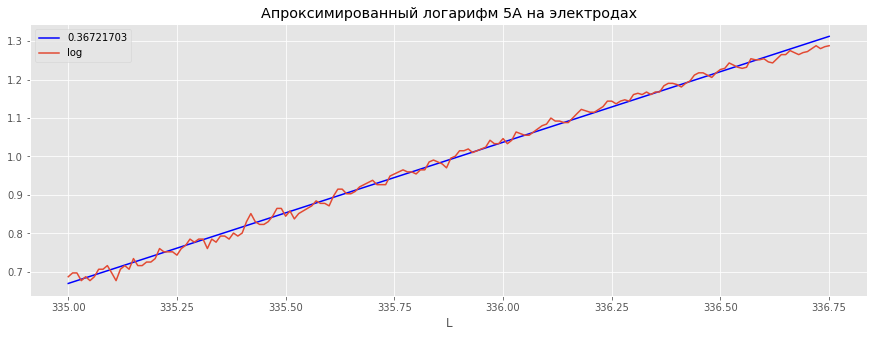

In [32]:
p = np.polyfit(x, y, 1)
yp = np.polyval(p, x)
print(p)

plt.plot(x, yp, 'b', label='0.36721703')
df_05A_electrod['log'][335:336.75].plot().set_title('Апроксимированный логарифм 5A на электродах')
plt.legend()
plt.show()

In [33]:
df_05A_general = pd.read_excel('05A_general.xlsx', index_col='L')

Text(0.5,1,'05A Общий')

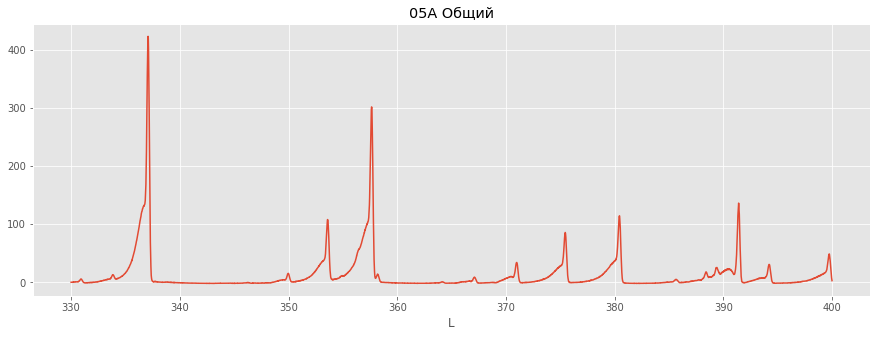

In [34]:
df_05A_general['I'].plot().set_title('05A Общий')

In [35]:
df_05A_general['log'] = np.log10(df_05A_general.I)

/home/danny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


Text(0.5,1,'Логарифм 5A Общий')

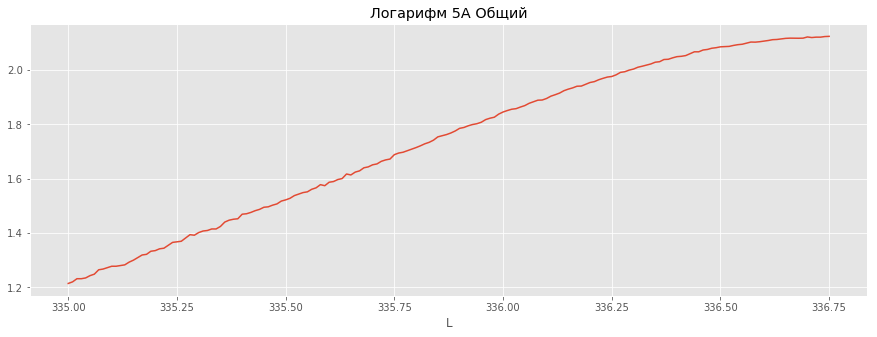

In [36]:
df_05A_general['log'][335:336.75].plot().set_title('Логарифм 5A Общий')

In [37]:
y = df_05A_general.log[335:336.75].values
x = df_05A_general.index.values[500:676]

[   0.56204893 -187.04140158]


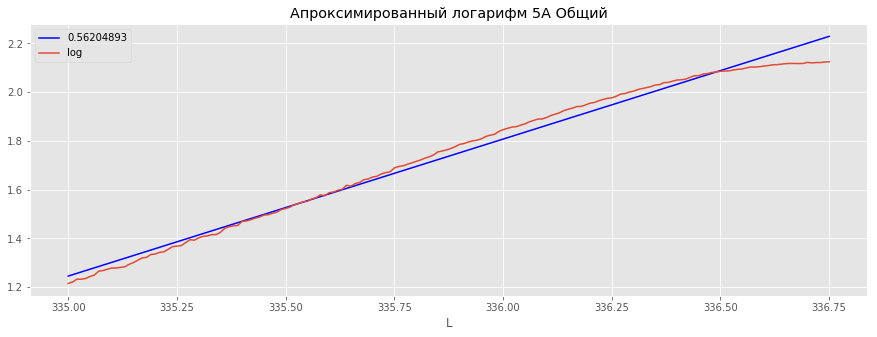

In [38]:
p = np.polyfit(x, y, 1)
yp = np.polyval(p, x)
print(p)

plt.plot(x, yp, 'b', label='0.56204893')
df_05A_general['log'][335:336.75].plot().set_title('Апроксимированный логарифм 5A Общий')
plt.legend()
plt.show()

In [39]:
df_changedP_04A = pd.read_excel('changedP_04A.xlsx', index_col='L')

Text(0.5,1,'04A измененное давление')

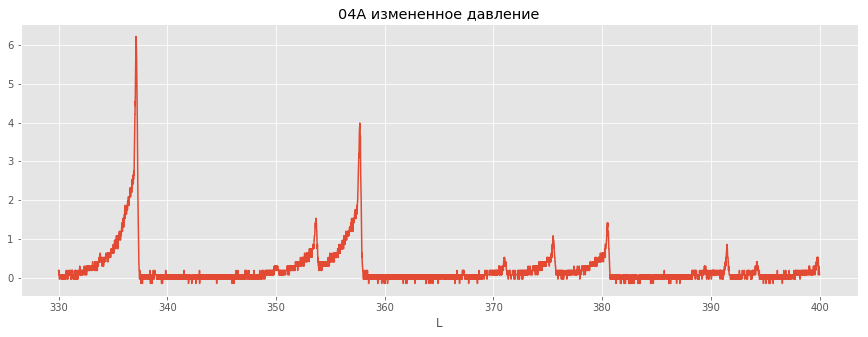

In [40]:
df_changedP_04A['I'].plot().set_title('04A измененное давление')

In [41]:
df_changedP_04A['log'] = np.log10(df_changedP_04A.I)

/home/danny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


Text(0.5,1,'Логарифм 4A измененное давление')

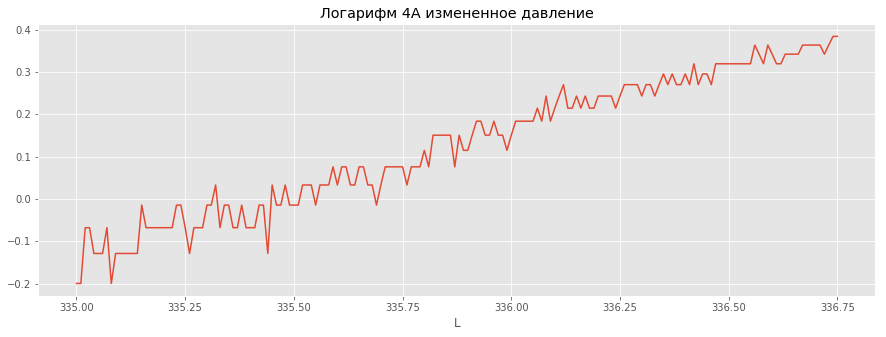

In [42]:
df_changedP_04A['log'][335:336.75].plot().set_title('Логарифм 4A измененное давление')

In [43]:
y = df_changedP_04A.log[335:336.75].values
x = df_changedP_04A.index.values[500:676]

[   0.30476565 -102.23811392]


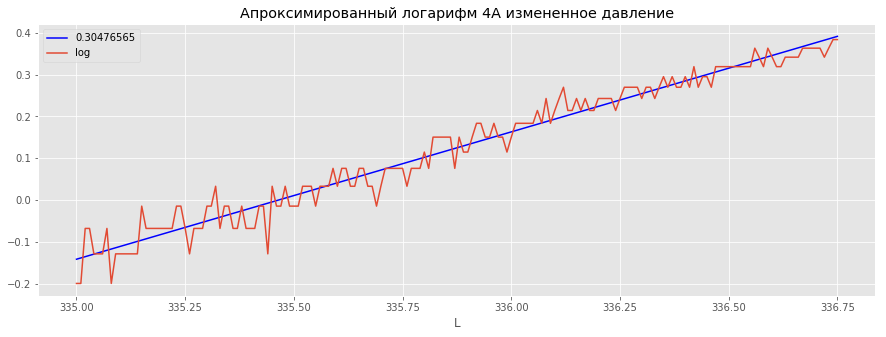

In [44]:
p = np.polyfit(x, y, 1)
yp = np.polyval(p, x)
print(p)

plt.plot(x, yp, 'b', label='0.30476565')
df_changedP_04A['log'][335:336.75].plot().set_title('Апроксимированный логарифм 4A измененное давление')
plt.legend()
plt.show()

In [45]:
df_changedP_04A_general = pd.read_excel('changedP_04A_general.xlsx', index_col='L')

Text(0.5,1,'changedP_04A_general')

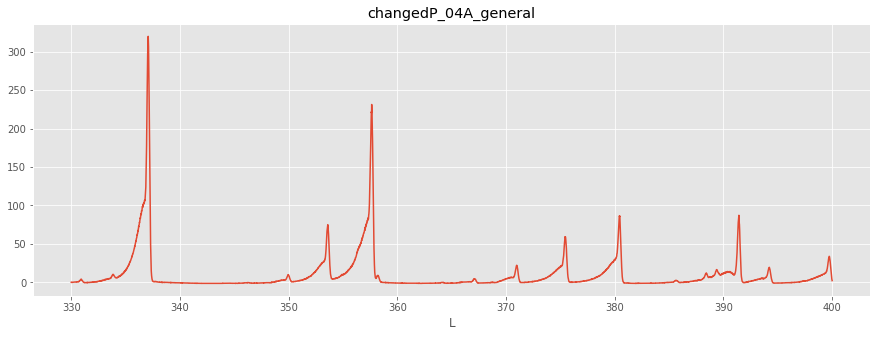

In [46]:
df_changedP_04A_general['I'].plot().set_title('changedP_04A_general')

In [47]:
df_changedP_04A_general['log'] = np.log10(df_changedP_04A_general.I)

/home/danny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


Text(0.5,1,'Логарифм 4A измененное давление общий')

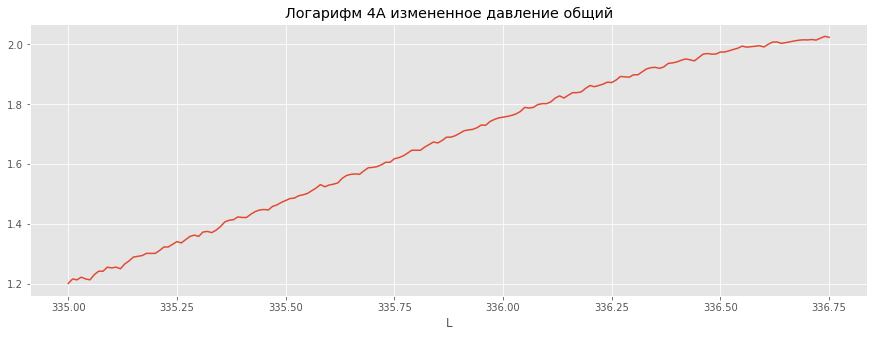

In [48]:
df_changedP_04A_general['log'][335:336.75].plot().set_title('Логарифм 4A измененное давление общий')

In [49]:
y = df_changedP_04A_general.log[335:336.75].values
x = df_changedP_04A_general.index.values[500:676]

[   0.50185566 -166.89546725]


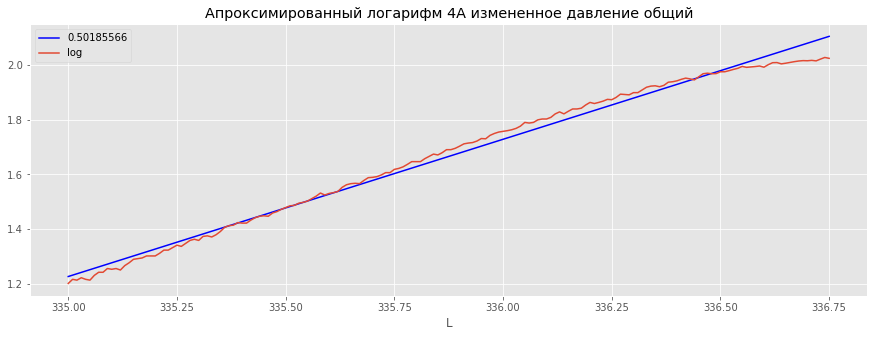

In [50]:
p = np.polyfit(x, y, 1)
yp = np.polyval(p, x)
print(p)

plt.plot(x, yp, 'b', label='0.50185566')
df_changedP_04A_general['log'][335:336.75].plot().set_title('Апроксимированный логарифм 4A измененное давление общий')
plt.legend()
plt.show()

In [51]:
df_M_04A_electrod = pd.read_excel('maximum/04A_electrod_maximum.xlsx')

In [52]:
df_M_04A_electrod['x'] = np.log(df_M_04A_electrod.I/(3*10**17/df_M_04A_electrod.L)**4*df_M_04A_electrod.q)
df_M_04A_electrod['y'] = df_M_04A_electrod.G/0.6925

In [53]:
df_M_04A_electrod

,jump,L,I,q,G,x,y
0,0-0,337.13,37.871372,0.45270,1016.7,-134.846691,1468.158845
1,1-2,353.66,9.576049,0.20330,3011.1,-136.830699,4348.158845
2,0-1,357.71,25.569057,0.32910,1016.7,-135.321356,1468.158845
3,3-5,367.16,1.076267,0.09426,6826.0,-139.635244,9857.039711
4,2-4,371.02,3.313051,0.16050,4951.9,-137.936803,7150.758123
5,1-3,375.51,7.227425,0.19900,3011.1,-136.893663,4348.158845
6,0-2,380.51,8.905013,0.14620,1016.7,-136.940351,1468.158845


In [54]:
x = df_M_04A_electrod.x
y = df_M_04A_electrod.y

[  -1854.83420173 -249653.34623729]


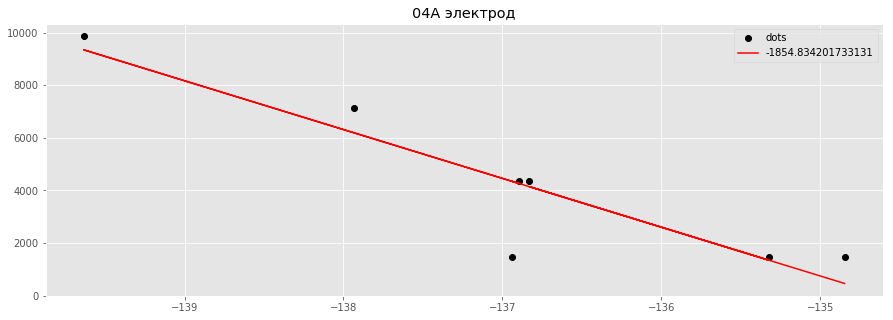

In [55]:
p = np.polyfit(x, y, 1)
yp = np.polyval(p, x)
print(p)

plt.plot(x, y, 'o', label='dots', color='k')
plt.plot(x, yp, 'r', label=p[0])
plt.legend()
plt.title('04A электрод')
plt.show()

In [56]:
df_M_04A_general = pd.read_excel('maximum/04A_general_maximum.xlsx')

df_M_04A_general['x'] = np.log(df_M_04A_general.I/(3*10**17/df_M_04A_general.L**4*df_M_04A_general.q))
df_M_04A_general['y'] = df_M_04A_general.G/0.6925

df_M_04A_general

,jump,L,I,q,G,x,y
0,0-0,337.12,348.226501,0.45270,1016.7,-10.315424,1468.158845
1,1-2,353.60,90.660759,0.20330,3011.1,-10.669696,4348.158845
2,0-1,357.64,258.866943,0.32910,1016.7,-10.056743,1468.158845
3,3-5,367.12,7.228692,0.09426,6826.0,-12.280047,9857.039711
4,2-4,371.00,28.589985,0.16050,4951.9,-11.395233,7150.758123
5,1-3,375.46,73.213837,0.19900,3011.1,-10.622116,4348.158845
6,0-2,380.44,98.601341,0.14620,1016.7,-9.963380,1468.158845


[ -3872.47703293 -37357.02220841]


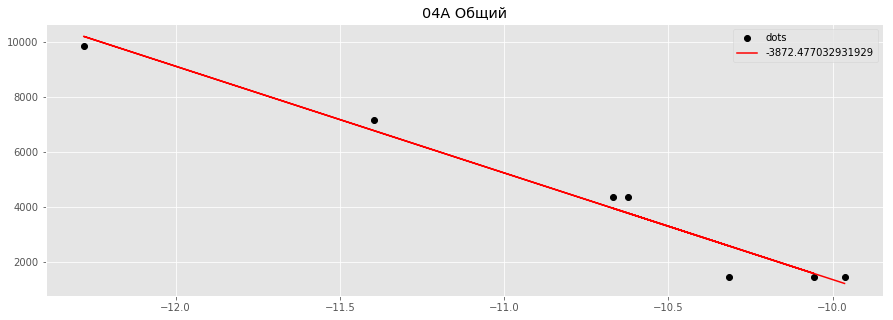

In [57]:
x = df_M_04A_general.x
y = df_M_04A_general.y

p = np.polyfit(x, y, 1)
yp = np.polyval(p, x)
print(p)

plt.plot(x, y, 'o', label='dots', color='k')
plt.plot(x, yp, 'r', label=p[0])
plt.legend()
plt.title('04A Общий')
plt.show()

In [58]:
df_M_04A_norm = pd.read_excel('maximum/04A_norm_maximum.xlsx')

df_M_04A_norm['x'] = np.log(df_M_04A_norm.I/(3*10**17/df_M_04A_norm.L**4*df_M_04A_norm.q))
df_M_04A_norm['y'] = df_M_04A_norm.G/0.6925

df_M_04A_norm

,jump,L,I,q,G,x,y
0,0-0,337.12,7.168229,0.45270,1016.7,-14.198619,1468.158845
1,1-2,353.63,1.799945,0.20330,3011.1,-14.588725,4348.158845
2,0-1,357.69,4.819605,0.32910,1016.7,-14.039807,1468.158845
3,3-5,367.15,0.346035,0.09426,6826.0,-15.318993,9857.039711
4,2-4,371.01,0.681553,0.16050,4951.9,-15.131563,7150.758123
5,1-3,375.52,1.240749,0.19900,3011.1,-14.699146,4348.158845


[ -6392.91816094 -88964.73027057]


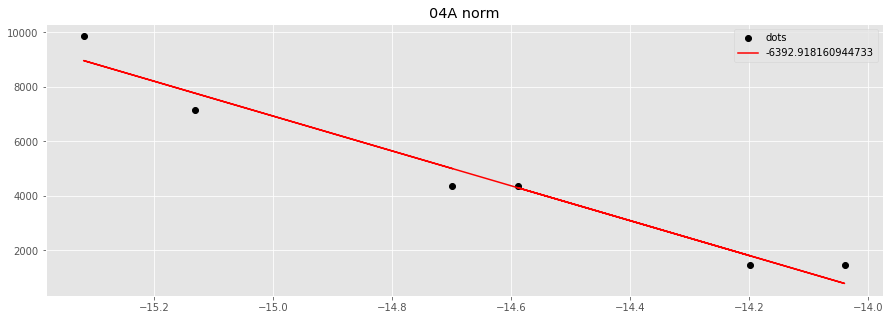

In [59]:
x = df_M_04A_norm.x
y = df_M_04A_norm.y

p = np.polyfit(x, y, 1)
yp = np.polyval(p, x)
print(p)

plt.plot(x, y, 'o', label='dots', color='k')
plt.plot(x, yp, 'r', label=p[0])
plt.legend()
plt.title('04A norm')
plt.show()

In [60]:
df_M_05A_electrod = pd.read_excel('maximum/05A_electrod_maximum.xlsx')

df_M_05A_electrod['x'] = np.log(df_M_05A_electrod.I/(3*10**17/df_M_05A_electrod.L**4*df_M_05A_electrod.q))
df_M_05A_electrod['y'] = df_M_05A_electrod.G/0.6925

df_M_05A_electrod

,jump,L,I,q,G,x,y
0,0->0,337.14,54.400,0.45270,1016.7,-12.171676,1468.158845
1,2->3,350.02,2.628,0.06345,4951.9,-13.086872,7150.758123
2,1->2,353.69,14.150,0.20330,3011.1,-12.526088,4348.158845
3,0->1,357.72,35.396,0.32910,1016.7,-12.045564,1468.158845
4,3->5,367.23,1.285,0.09426,6826.0,-14.006148,9857.039711
5,2->4,371.08,4.640,0.16050,4951.9,-13.212712,7150.758123
6,1->3,375.54,9.670,0.19900,3011.1,-12.645620,4348.158845
7,0->2,380.51,11.798,0.14620,1016.7,-12.085799,1468.158845


[ -4589.8514883  -53737.24238597]


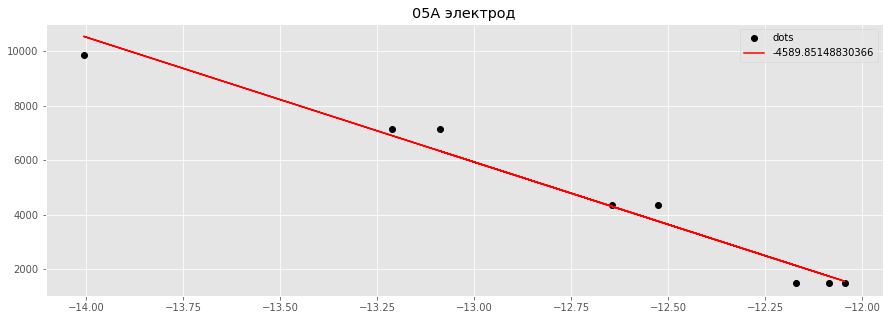

In [61]:
x = df_M_05A_electrod.x
y = df_M_05A_electrod.y

p = np.polyfit(x, y, 1)
yp = np.polyval(p, x)
print(p)

plt.plot(x, y, 'o', label='dots', color='k')
plt.plot(x, yp, 'r', label=p[0])
plt.legend()
plt.title('05A электрод')
plt.show()

In [62]:
df_M_05A_general = pd.read_excel('maximum/05A_general_maximum.xlsx')

df_M_05A_general['x'] = np.log(df_M_05A_general.I/(3*10**17/df_M_05A_general.L**4*df_M_05A_general.q))
df_M_05A_general['y'] = df_M_05A_general.G/0.6925

df_M_05A_general

,jump,L,I,q,G,x,y
0,0 -> 0,337.08,423.390,0.45270,1016.7,-10.120458,1468.158845
1,1->2,353.64,106.990,0.20330,3011.1,-10.503633,4348.158845
2,0->1,357.63,300.360,0.32910,1016.7,-9.908188,1468.158845
3,3->5,367.20,6.440,0.09426,6826.0,-12.394705,9857.039711
4,2->4,371.01,33.730,0.16050,4951.9,-11.229794,7150.758123
5,1->3,375.49,82.600,0.19900,3011.1,-10.501171,4348.158845
6,0->2,380.44,114.367,0.14620,1016.7,-9.815053,1468.158845


[ -3494.20592404 -32873.63060653]


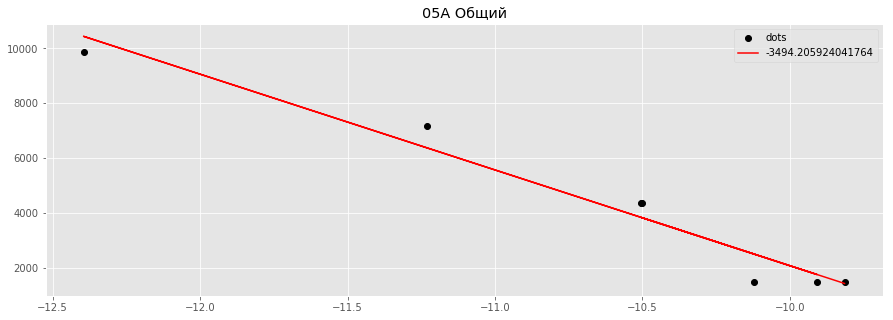

In [63]:
x = df_M_05A_general.x
y = df_M_05A_general.y

p = np.polyfit(x, y, 1)
yp = np.polyval(p, x)
print(p)

plt.plot(x, y, 'o', label='dots', color='k')
plt.plot(x, yp, 'r', label=p[0])
plt.legend()
plt.title('05A Общий')
plt.show()

In [64]:
df_M_05A_maximum = pd.read_excel('maximum/05A_maximum.xlsx')

df_M_05A_maximum['x'] = np.log(df_M_05A_maximum.I/(3*10**17/df_M_05A_maximum.L**4*df_M_05A_maximum.q))
df_M_05A_maximum['y'] = df_M_05A_maximum.G/0.6925

df_M_05A_maximum

,jump,L,I,q,G,x,y
0,0-0,337.14,11.266798,0.4527,1016.7,-13.746180,1468.158845
1,1-2,353.66,3.102534,0.2033,3011.1,-14.043923,4348.158845
2,0-1,357.71,7.687943,0.3291,1016.7,-13.572622,1468.158845
3,2-4,371.02,0.977588,0.1605,4951.9,-14.770740,7150.758123
4,1-3,375.53,2.319659,0.1990,3011.1,-14.073335,4348.158845
5,0-2,380.50,2.655177,0.1462,1016.7,-13.577323,1468.158845


[ -5032.02593248 -66892.05435325]


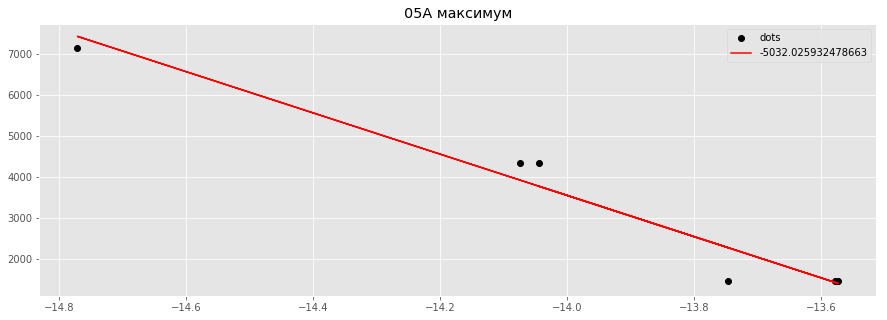

In [65]:
x = df_M_05A_maximum.x
y = df_M_05A_maximum.y

p = np.polyfit(x, y, 1)
yp = np.polyval(p, x)
print(p)

plt.plot(x, y, 'o', label='dots', color='k')
plt.plot(x, yp, 'r', label=p[0])
plt.legend()
plt.title('05A максимум')
plt.show()

In [66]:
df_changedP_04A_general_maximum = pd.read_excel('maximum/changedP_04A_general_maximum.xlsx')

df_changedP_04A_general_maximum['x'] = np.log(df_changedP_04A_general_maximum.I/(3*10**17/df_changedP_04A_general_maximum.L**4*df_changedP_04A_general_maximum.q))
df_changedP_04A_general_maximum['y'] = df_changedP_04A_general_maximum.G/0.6925

df_changedP_04A_general_maximum

,jump,L,I,q,G,x,y
0,0->0,337.08,319.85800,0.45270,1016.7,-10.400875,1468.158845
1,2->3,350.03,8.49800,0.06345,4951.9,-11.913149,7150.758123
2,1->2,353.61,75.04200,0.20330,3011.1,-10.858660,4348.158845
3,0->1,357.65,228.15065,0.32910,1016.7,-10.182940,1468.158845
4,3->5,367.26,1.56400,0.09426,6826.0,-13.809334,9857.039711
5,2->4,371.04,19.34680,0.16050,4951.9,-11.785331,7150.758123
6,1->3,375.49,56.70000,0.19900,3011.1,-10.877407,4348.158845
7,0->2,380.42,86.33800,0.14620,1016.7,-10.096406,1468.158845


[ -2446.72577384 -22845.03325072]


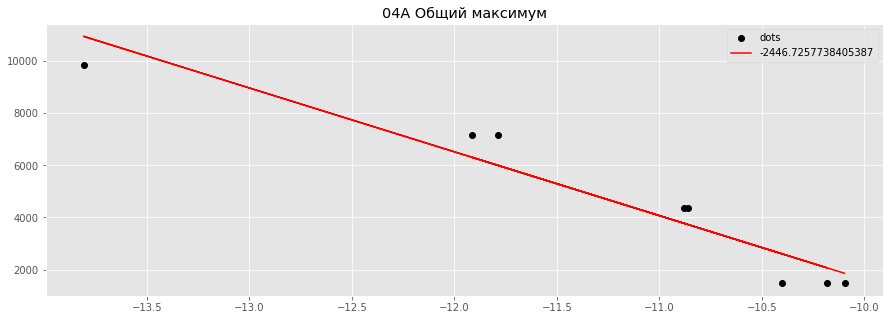

In [67]:
x = df_changedP_04A_general_maximum.x
y = df_changedP_04A_general_maximum.y

p = np.polyfit(x, y, 1)
yp = np.polyval(p, x)
print(p)

plt.plot(x, y, 'o', label='dots', color='k')
plt.plot(x, yp, 'r', label=p[0])
plt.legend()
plt.title('04A Общий максимум')
plt.show()

In [68]:
df_changedP_04A_maximum = pd.read_excel('maximum/changedP_04A_maximum.xlsx')

df_changedP_04A_maximum['x'] = np.log(df_changedP_04A_maximum.I/(3*10**17/df_changedP_04A_maximum.L**4*df_changedP_04A_maximum.q))
df_changedP_04A_maximum['y'] = df_changedP_04A_maximum.G/0.6925

df_changedP_04A_maximum

,jump,L,I,q,G,x,y
0,0->0,337.12,6.22300,0.4527,1016.7,-14.340025,1468.158845
1,1->2,353.65,1.52600,0.2033,3011.1,-14.753605,4348.158845
2,0->1,357.71,3.98667,0.3291,1016.7,-14.229319,1468.158845
3,1->3,375.49,1.07890,0.1990,3011.1,-14.839239,4348.158845
4,0->2,380.49,1.41400,0.1462,1016.7,-14.207517,1468.158845


[ -5153.82654209 -71976.02286776]


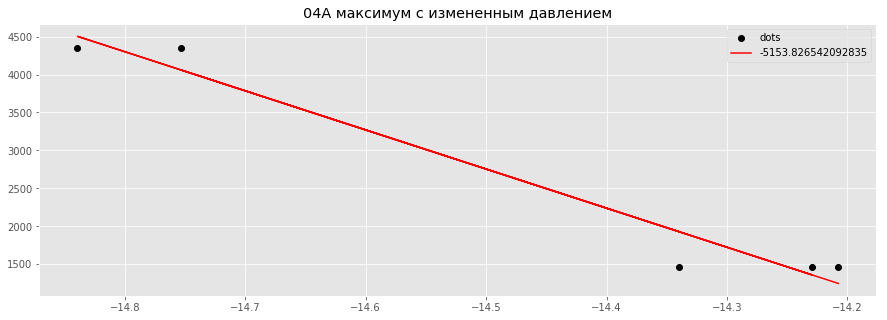

In [69]:
x = df_changedP_04A_maximum.x
y = df_changedP_04A_maximum.y

p = np.polyfit(x, y, 1)
yp = np.polyval(p, x)
print(p)

plt.plot(x, y, 'o', label='dots', color='k')
plt.plot(x, yp, 'r', label= p[0])
plt.legend()
plt.title('04A максимум с измененным давлением')
plt.show()

В рот ебал 

In [70]:
final_data_base = pd.DataFrame(np.array([6700, 6700, 6700, 6700, 6700, 6700, 9700, 9700]), columns = ['P'])

In [ ]:
final_data_base['index'] = np.array(['Сentral', ])

In [71]:
final_data_base['A'] = np.array([0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.4, 0.4])

In [72]:
final_data_base['T_rot'] = [1100, 1000, 800, 1200, 1100, 950, 1500, 900]

In [73]:
final_data_base['T_vib'] = [6300, 2000, 3800, 3200, 4500, 3500, 2500, 5100]

In [74]:
final_data_base.set_index('index')


KeyError: 'index'